In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data = pd.read_csv("C:/Users/aggar/Downloads/Cars.csv")

In [3]:
data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


## Correlation Matrix

In [5]:
data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


## Scatterplot

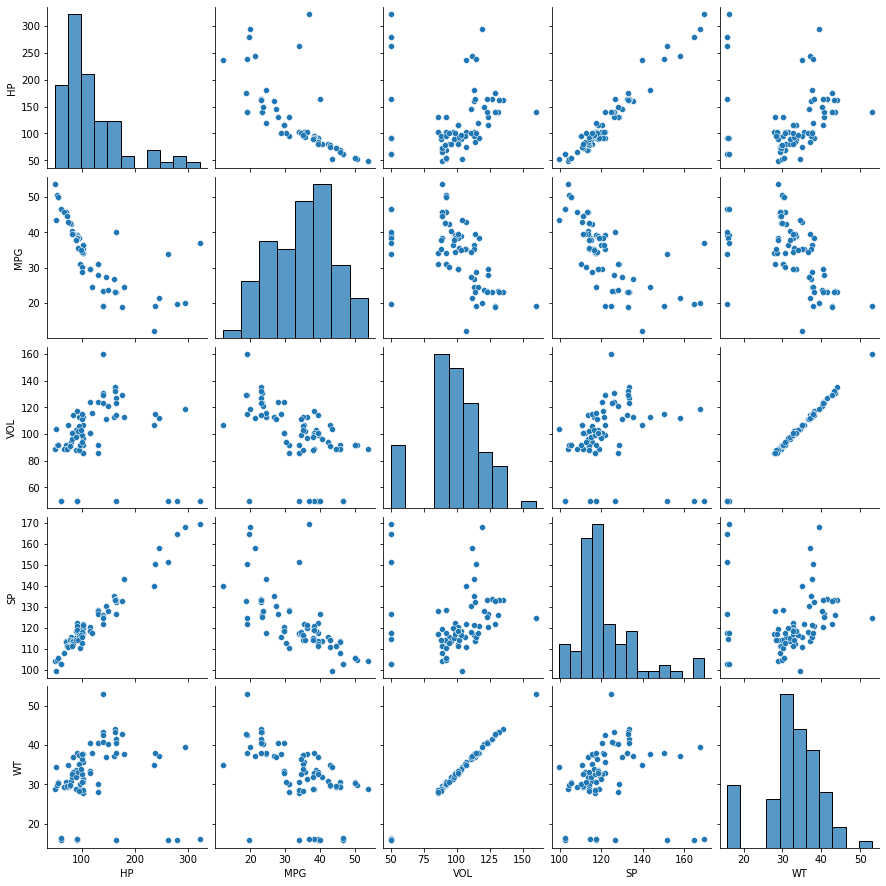

In [6]:
sns.pairplot(data)
plt.show()

## # Preparing a model


In [7]:
model = smf.ols('MPG~HP+VOL+SP+WT',data = data).fit()

In [8]:
model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [9]:
model.tvalues

Intercept    2.058841
HP          -5.238735
VOL         -0.590970
SP           2.499880
WT           0.236541
dtype: float64

In [10]:
model.pvalues

Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64

In [11]:
print(model.rsquared, model.rsquared_adj)

0.7705372737359844 0.7584602881431415


## Simple Linear Regression Models

In [12]:
model1 = smf.ols('MPG~VOL',data = data).fit()

In [13]:
model1.params

Intercept    55.817089
VOL          -0.216625
dtype: float64

In [14]:
model1.pvalues

Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64

In [15]:
model2 = smf.ols('MPG~WT',data = data).fit()

In [16]:
model2.pvalues

Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64

In [17]:
model3 = smf.ols('MPG~VOL+WT',data = data).fit()

In [18]:
model3.pvalues

Intercept    2.141975e-20
VOL          4.800657e-01
WT           6.255966e-01
dtype: float64

## Calculating VIF

In [19]:
hp = smf.ols('HP~VOL+SP+WT',data = data).fit()
hp_r = hp.rsquared

vol = smf.ols('VOL~HP+SP+WT',data = data).fit()
vol_r = vol.rsquared

sp = smf.ols('SP~VOL+HP+WT',data = data).fit()
sp_r = sp.rsquared

wt = smf.ols('WT~VOL+SP+HP',data = data).fit()
wt_r = wt.rsquared

In [20]:
hp_vir = 1/(1-hp_r)
vol_vir = 1/(1-vol_r)
sp_vir = 1/(1-sp_r)
wt_vir = 1/(1-wt_r)
vir_data = pd.DataFrame([[hp_vir, vol_vir, sp_vir, wt_vir]], columns=["HP","VOL","SP","WT"], index = ['VIR'])
vir_data

,HP,VOL,SP,WT
VIR,19.926589,638.806084,20.007639,639.533818


# Residual Analysis

## Test for Normal Distribution of Residuals (Q-Q Plot)

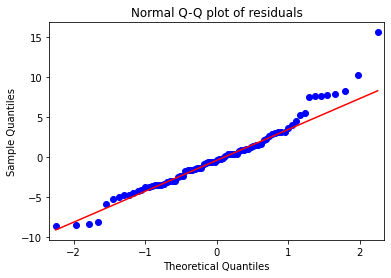

In [21]:
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [22]:
list(np.where(model.resid>10))

[array([ 0, 76], dtype=int64)]

## Residual Plot for Homoscedasticity

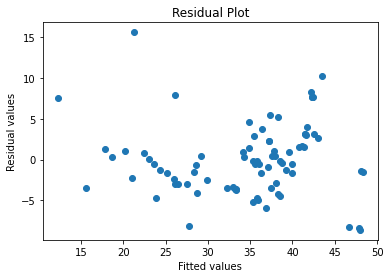

In [23]:
plt.scatter(model.fittedvalues, model.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residual values')
plt.show()

## Residual Vs Regressors

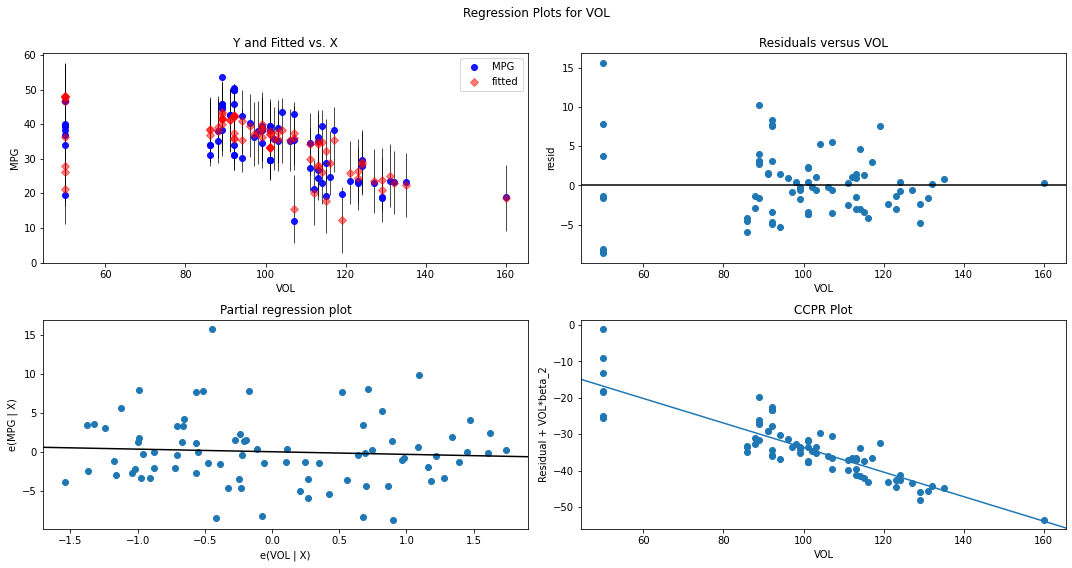

In [24]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig = fig)

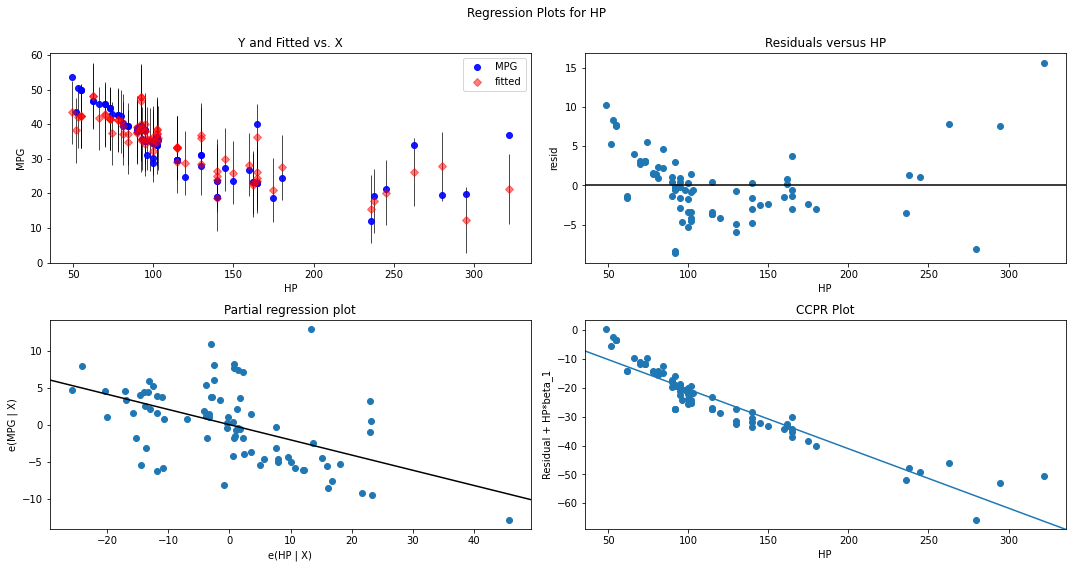

In [25]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig = fig)

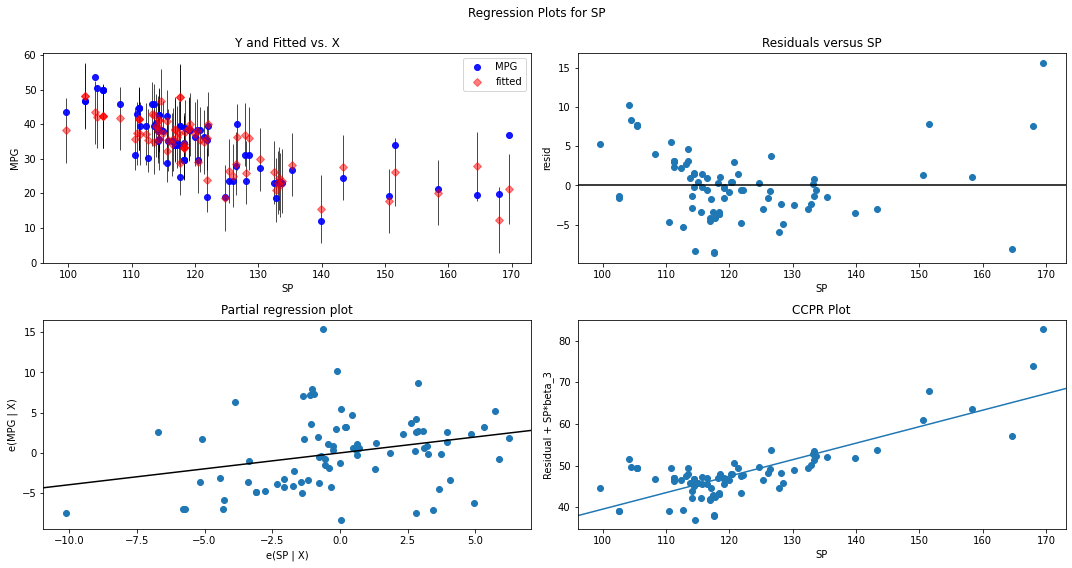

In [26]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "SP", fig = fig)

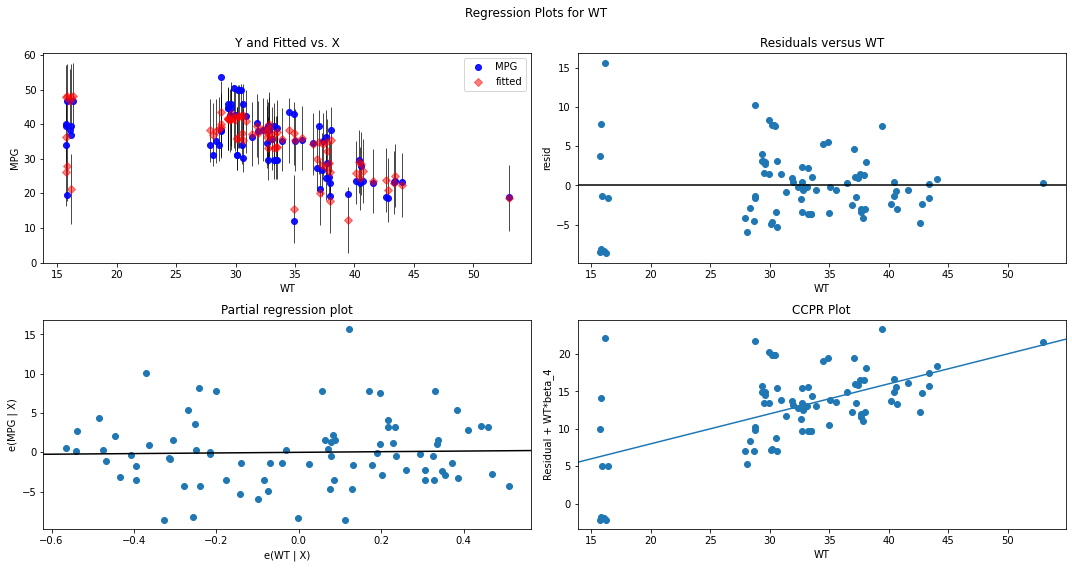

In [27]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "WT", fig = fig)

# Model Deletion Diagnostics
## Detecting Influencers/Outliers

## Cook’s Distance

In [28]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

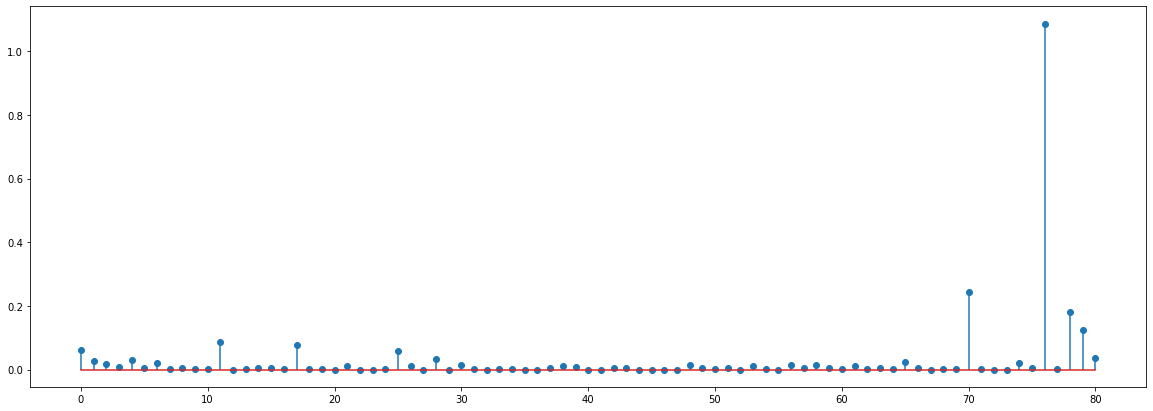

In [29]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.show()

In [30]:
list([np.argmax(c), np.max(c)])

[76, 1.0865193998179896]

## High Influence points

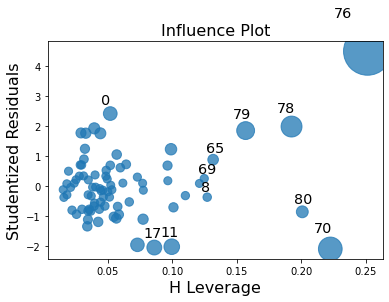

In [31]:
influence_plot(model)
plt.show()

In [32]:
k = data.shape[1]
n = data.shape[0]
leverage = 3*((k+1)/n)

In [33]:
leverage

0.2222222222222222

In [34]:
data.iloc[70:77,:]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
71,162,23.203569,135,133.415985,44.013139
72,162,23.203569,132,133.140074,43.353123
73,140,19.086341,160,124.715241,52.997752
74,140,19.086341,129,121.864163,42.618698
75,175,18.762837,129,132.864163,42.778219
76,322,36.900000,50,169.598513,16.132947


## Improving the model

In [35]:
data1 = data.drop([70,76]).reset_index()

In [36]:
data1=data1.drop(['index'],axis=1)

In [37]:
data1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [38]:
modelCheck1 = smf.ols('MPG~VOL+SP+HP',data = data1).fit()

In [39]:
modelCheck1.rsquared, modelCheck1.aic

(0.8161692010376005, 446.11722639447737)

In [40]:
modelCheck2 = smf.ols('MPG~WT+SP+HP',data = data1).fit()

In [41]:
modelCheck2.rsquared, modelCheck2.aic

(0.8160034320495304, 446.18843235750313)

##### Comparing above R-Square and AIC values, model 'modelCheck1' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

In [42]:
modelCheck1_influence = modelCheck1.get_influence()
(cV, _) = modelCheck1_influence.cooks_distance

<StemContainer object of 3 artists>

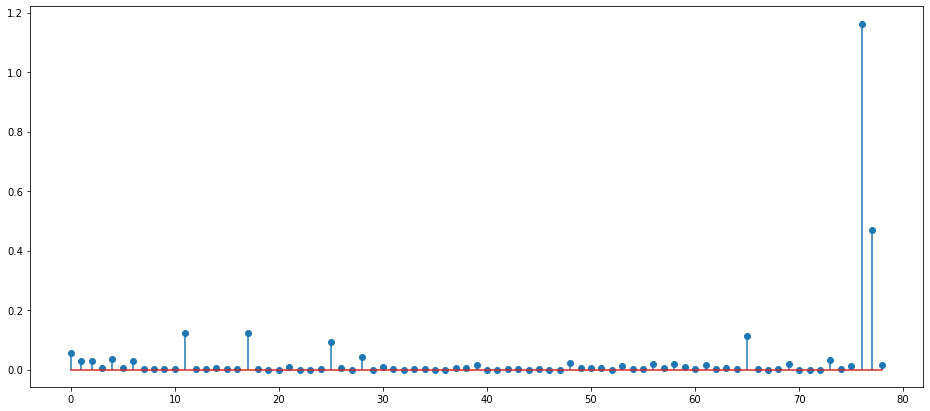

In [43]:
fig = plt.subplots(figsize=(16,7))
plt.stem(np.arange(len(data1)), np.round(cV,3))

In [44]:
list([np.argmax(cV), np.max(cV)])

[76, 1.1629387469135215]

In [45]:
data1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


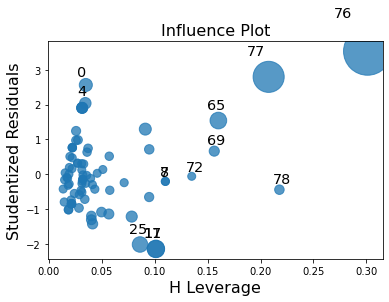

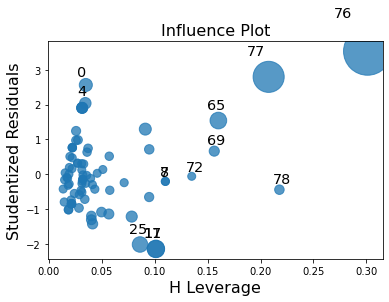

In [46]:
influence_plot(modelCheck1)

In [47]:
k = data1.shape[1]
n = data1.shape[0]
leverage = 3 * ((k+1)/n)

In [48]:
leverage

0.22784810126582278

In [49]:
data2 = data1.drop([76],axis = 0).reset_index()

In [50]:
data2 = data2.drop(['index'],axis = 1)

In [51]:
data2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,295,19.833733,119,167.944460,39.423099


In [52]:
model = smf.ols("MPG~HP+VOL+SP", data = data2).fit()

In [53]:
model_influence = model.get_influence()

In [54]:
(c,_) = model_influence.cooks_distance

<StemContainer object of 3 artists>

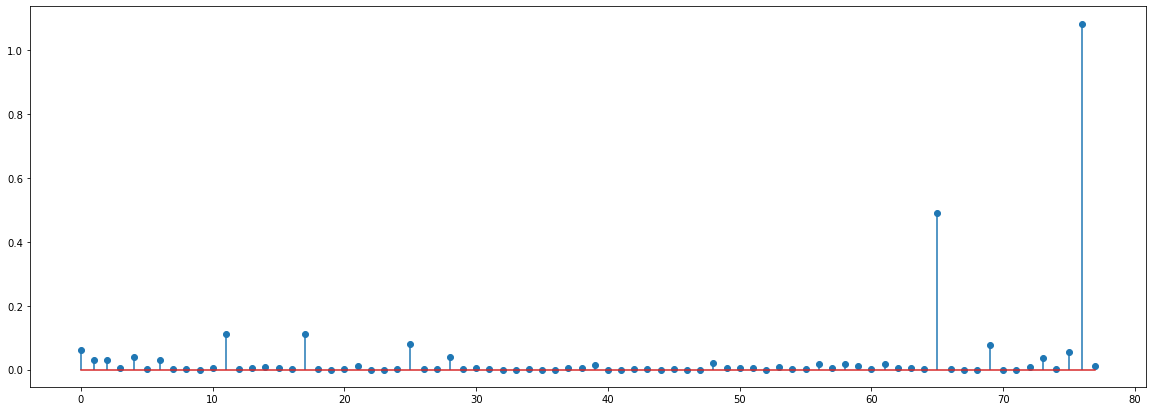

In [55]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data2)),np.round(c,3))

In [56]:
list([np.argmax(c), np.max(c)])

[76, 1.0834592065958777]

In [57]:
data2 = data2.drop([76],axis=0).reset_index()

In [58]:
data2 = data2.drop(['index'],axis=1)

In [59]:
data2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [60]:
model = smf.ols('MPG~HP+VOL+SP',data=data2).fit()

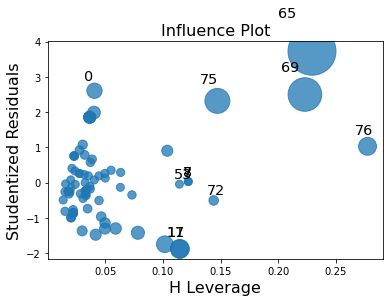

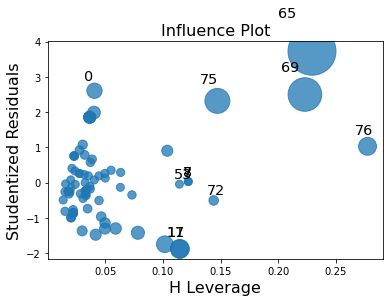

In [61]:
influence_plot(model)

In [62]:
k = data2.shape[1]
n = data2.shape[0]
leverage = 3*((k+1)/n)

In [63]:
leverage

0.23376623376623376

In [64]:
model_influence = model.get_influence()

In [65]:
(c,_) = model_influence.cooks_distance

<StemContainer object of 3 artists>

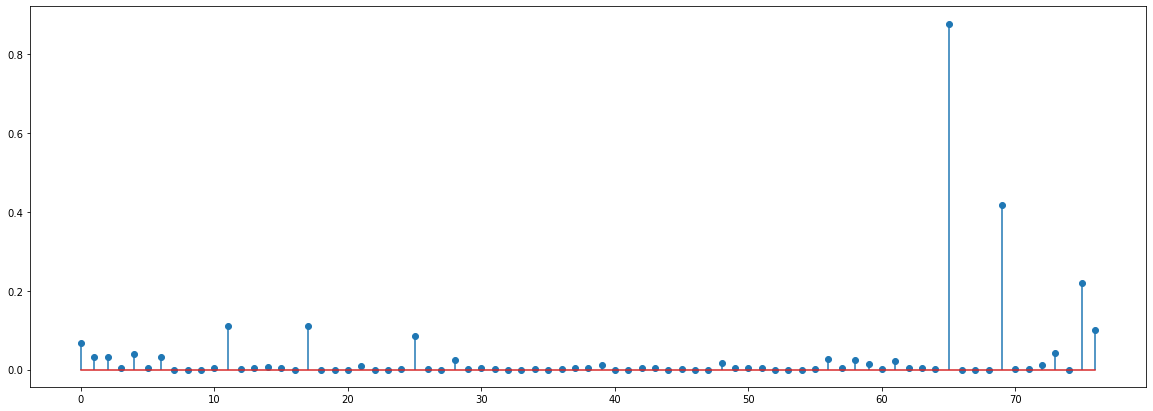

In [66]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data2)),np.round(c,3))

In [67]:
data2 = data2.drop([75],axis=0).reset_index()

In [68]:
data2 = data2.drop(['index'],axis = 1)

In [69]:
data2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
71,162,23.203569,132,133.140074,43.353123
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219


#### Since the value is <1 of cooks distance now, we can stop the diagnostic process and finalize the model.

## Predicting for new data

In [70]:
model = smf.ols("MPG~HP+VOL+SP",data=data2).fit()

In [71]:
model.params

Intercept    26.079061
HP           -0.271525
VOL          -0.131280
SP            0.429224
dtype: float64

In [72]:
model.pvalues

Intercept    2.060512e-02
HP           1.374258e-13
VOL          2.250334e-08
SP           5.296103e-04
dtype: float64

In [73]:
model.rsquared

0.8711016730757738

In [74]:
dataPredict = pd.DataFrame({'HP':55,"VOL":92,"SP":105,"WT":30},index=[1])

In [75]:
dataPredict

,HP,VOL,SP,WT
1,55,92,105,30


In [76]:
model.predict(dataPredict)

1    44.135849
dtype: float64